In [1]:
import stim
import numpy as np
import pymatching
import sinter
from typing import List
import matplotlib.pyplot as plt
import scipy.stats

In [1]:
import stim

# 回路の初期化
def initialize_circuit():
    circuit = stim.Circuit()
    return circuit

# キュービットの座標とインデックスの定義
def define_qubit_coords():
    qubit_coords = {
        0: (2, 0), 1: (4, 0), 2: (6, 0),
        3: (2, 2), 4: (4, 2),
        5: (0, 4), 6: (2, 4), 7: (4, 4),
        8: (0, 6), 9: (2, 6), 10: (4, 6)
    }
    additional_qubits = {
        11: (3, 0), 12: (5, 0), 13: (1, 2), 14: (3, 2), 15: (5, 2),
        16: (1, 4), 17: (3, 4), 18: (5, 4), 19: (-1, 6), 20: (3, 6), 21: (1, 6)
    }
    qubit_coords.update(additional_qubits)
    return qubit_coords

# キュービットのインデックスと座標のマッピング
def map_qubit_indices(qubit_coords):
    qubit_indices = {}
    for qubit, (x, y) in qubit_coords.items():
        qubit_indices[(x, y)] = qubit
    return qubit_indices

# QUBIT_COORDS命令の追加
def append_qubit_coords(circuit, qubit_coords):
    for qubit, (x, y) in qubit_coords.items():
        circuit.append("QUBIT_COORDS", [qubit], [x, y])

# すべてのキュービットをリセット
def reset_all_qubits(circuit, qubit_coords):
    for qubit in qubit_coords:
        circuit.append("R", [qubit])

# ペアに対するゲート操作の適用
def apply_gates(circuit, pairs, gate, tick=True):
    control_bits = [pair[0] for pair in pairs]
    circuit.append(gate, control_bits)
    if tick:
        circuit.append("TICK")

# ペアに対するCNOTゲートの適用
def apply_cnot_gates(circuit, pairs, tick=True):
    circuit.append("CNOT", sum(([control, target] for control, target in pairs), []))
    if tick:
        circuit.append("TICK")

# ペアに対する測定
def measure_qubits(circuit, pairs, targets, tick=True):
    circuit.append("M", targets)
    if tick:
        circuit.append("TICK")

# 測定結果に対してディテクターを追加 (blue_Zペアに対する処理)
def add_detectors(circuit, pairs, qubit_coords):
    # blue_Zペアに対するディテクターの追加
    for i in range(len(pairs)):
        target_qubits = [pairs[i][1]]
        coords = [qubit_coords[qubit] for qubit in target_qubits]
        centroid = (
            sum(coord[0] for coord in coords) / len(coords),
            sum(coord[1] for coord in coords) / len(coords)
        )
        circuit.append("DETECTOR", [stim.target_rec(-1 - i)], centroid)

    circuit.append("DETECTOR", [stim.target_rec(-13)], (-1, 6))
    circuit.append("DETECTOR", [stim.target_rec(-10)], (3, 6))
    circuit.append("DETECTOR", [stim.target_rec(-15), stim.target_rec(-14), stim.target_rec(-16)], (3, 4))
    circuit.append("DETECTOR", [stim.target_rec(-17), stim.target_rec(-18)], (1, 6))
    circuit.append("DETECTOR", [stim.target_rec(-20), stim.target_rec(-19)], (0, 3))
    circuit.append("DETECTOR", [stim.target_rec(-12), stim.target_rec(-11)], (5, 2))
    circuit.append("TICK")

# メイン関数
def main():
    circuit = initialize_circuit()
    qubit_coords = define_qubit_coords()
    qubit_indices = map_qubit_indices(qubit_coords)

    append_qubit_coords(circuit, qubit_coords)
    reset_all_qubits(circuit, qubit_coords)
    circuit.append("TICK")

    blue_X_pair = [(0, 3), (1, 4), (5, 6), (8, 9)]
    green_Z_pair = [(3, 4), (6, 9), (7, 10), (5, 8)]
    red_X_pair = [(1, 2), (4, 7), (9, 10), (3, 6)]
    blue_Z_pair = [(0, 3), (1, 4), (5, 6), (2, 7)]

    apply_gates(circuit, blue_X_pair, "H")
    apply_cnot_gates(circuit, blue_X_pair)
    apply_gates(circuit, blue_X_pair, "H")
    measure_qubits(circuit, blue_X_pair, [pair[0] for pair in blue_X_pair])
    apply_cnot_gates(circuit, blue_X_pair)
    apply_cnot_gates(circuit, green_Z_pair)
    measure_qubits(circuit, green_Z_pair, [pair[1] for pair in green_Z_pair])
    apply_cnot_gates(circuit, green_Z_pair)

    apply_gates(circuit, red_X_pair, "H")
    apply_cnot_gates(circuit, red_X_pair)
    apply_gates(circuit, red_X_pair, "H")
    measure_qubits(circuit, red_X_pair, [pair[0] for pair in red_X_pair])
    apply_cnot_gates(circuit, red_X_pair)

    apply_gates(circuit, blue_Z_pair, "H")
    apply_cnot_gates(circuit, blue_Z_pair)
    measure_qubits(circuit, blue_Z_pair, [pair[1] for pair in blue_Z_pair])
    apply_cnot_gates(circuit, blue_Z_pair)
    add_detectors(circuit, blue_Z_pair, qubit_coords)
    apply_gates(circuit, blue_Z_pair, "H")
    measure_qubits(circuit, blue_Z_pair, [pair[1] for pair in blue_Z_pair])

    # red_Xペアに対する操作の追加
    apply_gates(circuit, red_X_pair, "H")
    apply_cnot_gates(circuit, red_X_pair)
    apply_gates(circuit, red_X_pair, "H")
    measure_qubits(circuit, red_X_pair, [pair[0] for pair in red_X_pair])
    apply_cnot_gates(circuit, red_X_pair)

    # 回路の表示
    print(circuit)

if __name__ == "__main__":
    main()


QUBIT_COORDS(2, 0) 0
QUBIT_COORDS(4, 0) 1
QUBIT_COORDS(6, 0) 2
QUBIT_COORDS(2, 2) 3
QUBIT_COORDS(4, 2) 4
QUBIT_COORDS(0, 4) 5
QUBIT_COORDS(2, 4) 6
QUBIT_COORDS(4, 4) 7
QUBIT_COORDS(0, 6) 8
QUBIT_COORDS(2, 6) 9
QUBIT_COORDS(4, 6) 10
QUBIT_COORDS(3, 0) 11
QUBIT_COORDS(5, 0) 12
QUBIT_COORDS(1, 2) 13
QUBIT_COORDS(3, 2) 14
QUBIT_COORDS(5, 2) 15
QUBIT_COORDS(1, 4) 16
QUBIT_COORDS(3, 4) 17
QUBIT_COORDS(5, 4) 18
QUBIT_COORDS(-1, 6) 19
QUBIT_COORDS(3, 6) 20
QUBIT_COORDS(1, 6) 21
R 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21
TICK
H 0 1 5 8
TICK
CX 0 3 1 4 5 6 8 9
TICK
H 0 1 5 8
TICK
M 0 1 5 8
TICK
CX 0 3 1 4 5 6 8 9
TICK
CX 3 4 6 9 7 10 5 8
TICK
M 4 9 10 8
TICK
CX 3 4 6 9 7 10 5 8
TICK
H 1 4 9 3
TICK
CX 1 2 4 7 9 10 3 6
TICK
H 1 4 9 3
TICK
M 1 4 9 3
TICK
CX 1 2 4 7 9 10 3 6
TICK
H 0 1 5 2
TICK
CX 0 3 1 4 5 6 2 7
TICK
M 3 4 6 7
TICK
CX 0 3 1 4 5 6 2 7
TICK
DETECTOR(2, 2) rec[-1]
DETECTOR(4, 2) rec[-2]
DETECTOR(2, 4) rec[-3]
DETECTOR(4, 4) rec[-4]
DETECTOR(-1, 6) rec[-13]
DETECTOR(3, 6

In [2]:
circuit.diagram('timeline-svg')

NameError: name 'circuit' is not defined

In [9]:
def build_surface_code_circuit(qubit_coords, distance,rounds=5, lookback_distance=1, noise=0.001):
    """
    指定された量子ビットの座標を使用して、表面コードの回路を構築し、
    測定の後にディテクターを追加します。シンドローム測定は MR を使用します。
    最初のアンシラ量子ビットのリセットは残します。SHIFT_COORDS を追加して、
    ディテクターの座標を時間方向にシフトします。

    Parameters:
    - qubit_coords: 量子ビットの座標とインデックスの辞書 {(x, y): qubit_index}
    - rounds: スタビライザー測定の繰り返し回数（デフォルトは5）
    - lookback_distance: ディテクターが見る測定結果の距離（デフォルトは1）

    Returns:
    - circuit: 構築された stim.Circuit オブジェクト
    """
    circuit = stim.Circuit()

    # データ量子ビットと補助量子ビットの分類
    data_qubits = {}
    ancilla_qubits = {}
    qubit_indices = {}

    for (x, y), qubit in qubit_coords.items():
        qubit_indices[qubit] = (x, y)
        if qubit <= distance**2-1:
            data_qubits[(x, y)] = qubit
        else:
            ancilla_qubits[(x, y)] = qubit
    
    # QUBIT_COORDS を回路に追加
    for qubit, (x, y) in qubit_indices.items():
        circuit.append("QUBIT_COORDS", [qubit], [x, y])

    # データ量子ビットとアンシラ量子ビットの初期化
    circuit.append("R", list(data_qubits.values()))
    circuit.append("X_ERROR", list(data_qubits.values()), noise)
    circuit.append("R", list(ancilla_qubits.values()))  # 最初のアンシラ量子ビットのリセット
    circuit.append("X_ERROR", list(ancilla_qubits.values()), noise)  # RESET で x エラー
    circuit.append("TICK")  # Reset の後に TICK

    num_ancilla = len(ancilla_qubits)  # アンシラ量子ビットの数
    total_measurements = 0  # 累積測定数の初期化

    # スタビライザー測定のラウンド
    for round_num in range(rounds):
        # MR を使用するため、ラウンド開始時のリセット操作は不要

        # X スタビライザーの補助量子ビットに H を適用
        x_ancillas = []
        for (x, y), ancilla in ancilla_qubits.items():
            if (x + y) % 4 != 0:
                x_ancillas.append(ancilla)
        x_ancillas = sorted(x_ancillas)
        circuit.append("H", x_ancillas)
        circuit.append("DEPOLARIZE1", x_ancillas, noise)  # H の後に depolarizing error
        circuit.append("TICK")  # H の後に TICK

        # X と Z スタビライザーの CNOT ゲートを収集
        x_cnot_ops = [[] for _ in range(4)]
        z_cnot_ops = [[] for _ in range(4)]

        # X スタビライザーの CNOT (制御: 補助, ターゲット: データ)
        for ancilla in x_ancillas:
            x_pos, y_pos = qubit_indices[ancilla]
            for idx, (dx, dy) in enumerate([(1, 1), (-1, 1), (1, -1), (-1, -1)]):
                nx, ny = x_pos + dx, y_pos + dy
                if (nx, ny) in data_qubits:
                    data = data_qubits[(nx, ny)]
                    x_cnot_ops[idx].append((ancilla, data))

        # Z スタビライザーの CNOT (制御: データ, ターゲット: 補助)
        z_ancillas = []
        z_stabilizer_targets = {}  # Zスタビライザーのターゲットデータ量子ビットを保存する辞書
        for (x, y), ancilla in ancilla_qubits.items():
            if (x + y) % 4 == 0:
                z_ancillas.append(ancilla)
        z_ancillas = sorted(z_ancillas)
        for ancilla in z_ancillas:
            x_pos, y_pos = qubit_indices[ancilla]
            z_stabilizer_targets[ancilla] = []  # ターゲットデータ量子ビットのリストを初期化
            for idx, (dx, dy) in enumerate([(1, 1), (1, -1), (-1, 1), (-1, -1)]):
                nx, ny = x_pos + dx, y_pos + dy
                if (nx, ny) in data_qubits:
                    data = data_qubits[(nx, ny)]
                    z_cnot_ops[idx].append((data, ancilla))
                    z_stabilizer_targets[ancilla].append(data)  # ターゲットデータ量子ビットを追加
        
        # X と Z スタビライザーの CNOT を同時に追加し、4tick で終了するようにする
        for idx in range(4):
            combined_cnot_ops = x_cnot_ops[idx] + z_cnot_ops[idx]
            if combined_cnot_ops:
                controls, targets = zip(*combined_cnot_ops)
                cnot_targets = [q for pair in zip(controls, targets) for q in pair]
                circuit.append("CNOT", cnot_targets)
                circuit.append("DEPOLARIZE2", cnot_targets, noise)  # CNOT の後に 2qubit depolarizing error
                circuit.append("TICK")  # CNOT の後に TICK

        # X スタビライザーの補助量子ビットに H を適用
        circuit.append("H", x_ancillas)
        circuit.append("DEPOLARIZE1", x_ancillas, noise)  # H の後に depolarizing error
        circuit.append("TICK")  # H の後に TICK

        # すべての補助量子ビットを MR で測定
        sorted_ancillas = sorted(ancilla_qubits.values())
        circuit.append("X_ERROR", sorted_ancillas, noise)
        circuit.append("MR", sorted_ancillas)
        circuit.append("X_ERROR", sorted_ancillas, noise)  # 測定の後に x エラー
        circuit.append("TICK")  # 測定の後に TICK

        # 累積測定数を更新
        total_measurements += num_ancilla

        # ディテクターを追加
        for i, ancilla in enumerate(sorted_ancillas):
            x_pos, y_pos = qubit_indices[ancilla]

            # 現在の測定結果へのルックバックインデックス
            current_lookback = i - num_ancilla  # = -(num_ancilla - i)
            lookbacks = [stim.target_rec(current_lookback)]

            # 過去 a 個前までの測定結果を追加
            if round_num > 0:
                for j in range(1, lookback_distance + 1):
                    if round_num >= j:
                        prev_lookback = i - (j + 1) * num_ancilla  # = -(j + 1) * num_ancilla - i
                        lookbacks.append(stim.target_rec(prev_lookback))

                circuit.append(
                    "DETECTOR",
                    lookbacks,
                    [x_pos, y_pos, 0]
                )
            else:
                if (x_pos+y_pos)%4 == 0:
                    # 最初のラウンドでは、測定結果のみを使用
                    circuit.append(
                        "DETECTOR",
                        [stim.target_rec(current_lookback)],
                        [x_pos, y_pos, 0]
                    )

        circuit.append("SHIFT_COORDS", [], (0, 0, 1))

    # データ量子ビットの最終測定
    circuit.append("X_ERROR", list(data_qubits.values()), noise)
    circuit.append("M", list(data_qubits.values()))
    print(z_stabilizer_targets)
    for ancilla, targets in z_stabilizer_targets.items():
        x_pos, y_pos = qubit_indices[ancilla]
        detect_targets = [stim.target_rec(targets[i]-len(data_qubits)) for i in range(len(targets))]
        detect_targets.append(stim.target_rec(ancilla-2*len(data_qubits)-len(ancilla_qubits)))
        print(detect_targets)
        circuit.append(
            "DETECTOR",
            detect_targets,
            [x_pos, y_pos, 0]
            )
    num_data_qubits = int(len(data_qubits) ** 0.5)
    observable_targets = [stim.target_rec(-i) for i in range(1, num_data_qubits + 1)]
    circuit.append("OBSERVABLE_INCLUDE", observable_targets, 0)
    circuit.append("TICK")  # 測定の後に TICK
    return circuit


In [13]:
def make_surface_code_circuit(distance, rounds, lookback_distance,noise):
    circuit = build_surface_code_circuit(qubit_coords=generate_qubit_coords(d=distance),distance=distance, rounds=rounds, lookback_distance=lookback_distance, noise=noise)
    return circuit

In [16]:
circuit = make_surface_code_circuit(distance=3,rounds=3*3,lookback_distance=1,noise=0.001)
print(circuit)

{10: [4, 1, 3, 0], 12: [5, 2], 13: [6, 3], 15: [8, 5, 7, 4]}
[stim.target_rec(-5), stim.target_rec(-8), stim.target_rec(-6), stim.target_rec(-9), stim.target_rec(-16)]
[stim.target_rec(-4), stim.target_rec(-7), stim.target_rec(-14)]
[stim.target_rec(-3), stim.target_rec(-6), stim.target_rec(-13)]
[stim.target_rec(-1), stim.target_rec(-4), stim.target_rec(-2), stim.target_rec(-5), stim.target_rec(-11)]
QUBIT_COORDS(1, 1) 0
QUBIT_COORDS(3, 1) 1
QUBIT_COORDS(5, 1) 2
QUBIT_COORDS(1, 3) 3
QUBIT_COORDS(3, 3) 4
QUBIT_COORDS(5, 3) 5
QUBIT_COORDS(1, 5) 6
QUBIT_COORDS(3, 5) 7
QUBIT_COORDS(5, 5) 8
QUBIT_COORDS(2, 0) 9
QUBIT_COORDS(2, 2) 10
QUBIT_COORDS(4, 2) 11
QUBIT_COORDS(6, 2) 12
QUBIT_COORDS(0, 4) 13
QUBIT_COORDS(2, 4) 14
QUBIT_COORDS(4, 4) 15
QUBIT_COORDS(4, 6) 16
R 0 1 2 3 4 5 6 7 8
X_ERROR(0.001) 0 1 2 3 4 5 6 7 8
R 9 10 11 12 13 14 15 16
X_ERROR(0.001) 9 10 11 12 13 14 15 16
TICK
H 9 11 14 16
DEPOLARIZE1(0.001) 9 11 14 16
TICK
CX 9 1 11 5 14 7 4 10 6 13 8 15
DEPOLARIZE2(0.001) 9 1 11 5 14

In [ ]:
surface_code_circuit.without_noise().diagram("timeslice-svg")

In [19]:
def count_logical_errors(circuit: stim.Circuit, num_shots: int) -> int:
    # Sample the circuit.
    sampler = circuit.compile_detector_sampler()
    detection_events, observable_flips = sampler.sample(num_shots, separate_observables=True)

    # Configure a decoder using the circuit.
    detector_error_model = circuit.detector_error_model(decompose_errors=True)
    matcher = pymatching.Matching.from_detector_error_model(detector_error_model)

    # Run the decoder.
    predictions = matcher.decode_batch(detection_events)

    # Count the mistakes.
    num_errors = 0
    for shot in range(num_shots):
        actual_for_shot = observable_flips[shot]
        predicted_for_shot = predictions[shot]
        if not np.array_equal(actual_for_shot, predicted_for_shot):
            num_errors += 1
    return num_errors

In [23]:
noise_list = [0.001,0.004,0.005,0.006,0.007,0.008, 0.009, 0.01, 0.011, 0.012, 0.013]
surface_code_tasks = [
    sinter.Task(
        circuit = make_surface_code_circuit(distance=d,rounds=d*3,lookback_distance=1,noise=noise),
        json_metadata={'d': d, 'r': d * 3, 'p': noise},
    )
    for d in [3, 5, 7, 9, 11]
    for noise in noise_list
]

collected_surface_code_stats: List[sinter.TaskStats] = sinter.collect(
    num_workers=4,
    tasks=surface_code_tasks,
    decoders=['pymatching'],
    max_shots=1_000_000,
    max_errors=5_000,
    print_progress=True,
)

{10: [4, 1, 3, 0], 12: [5, 2], 13: [6, 3], 15: [8, 5, 7, 4]}
[stim.target_rec(-5), stim.target_rec(-8), stim.target_rec(-6), stim.target_rec(-9), stim.target_rec(-16)]
[stim.target_rec(-4), stim.target_rec(-7), stim.target_rec(-14)]
[stim.target_rec(-3), stim.target_rec(-6), stim.target_rec(-13)]
[stim.target_rec(-1), stim.target_rec(-4), stim.target_rec(-2), stim.target_rec(-5), stim.target_rec(-11)]
{10: [4, 1, 3, 0], 12: [5, 2], 13: [6, 3], 15: [8, 5, 7, 4]}
[stim.target_rec(-5), stim.target_rec(-8), stim.target_rec(-6), stim.target_rec(-9), stim.target_rec(-16)]
[stim.target_rec(-4), stim.target_rec(-7), stim.target_rec(-14)]
[stim.target_rec(-3), stim.target_rec(-6), stim.target_rec(-13)]
[stim.target_rec(-1), stim.target_rec(-4), stim.target_rec(-2), stim.target_rec(-5), stim.target_rec(-11)]
{10: [4, 1, 3, 0], 12: [5, 2], 13: [6, 3], 15: [8, 5, 7, 4]}
[stim.target_rec(-5), stim.target_rec(-8), stim.target_rec(-6), stim.target_rec(-9), stim.target_rec(-16)]
[stim.target_rec(-4), 

Starting 4 workers...


{126: [12, 1, 11, 0], 128: [14, 3, 13, 2], 130: [16, 5, 15, 4], 132: [18, 7, 17, 6], 134: [20, 9, 19, 8], 136: [21, 10], 137: [22, 11], 139: [24, 13, 23, 12], 141: [26, 15, 25, 14], 143: [28, 17, 27, 16], 145: [30, 19, 29, 18], 147: [32, 21, 31, 20], 148: [34, 23, 33, 22], 150: [36, 25, 35, 24], 152: [38, 27, 37, 26], 154: [40, 29, 39, 28], 156: [42, 31, 41, 30], 158: [43, 32], 159: [44, 33], 161: [46, 35, 45, 34], 163: [48, 37, 47, 36], 165: [50, 39, 49, 38], 167: [52, 41, 51, 40], 169: [54, 43, 53, 42], 170: [56, 45, 55, 44], 172: [58, 47, 57, 46], 174: [60, 49, 59, 48], 176: [62, 51, 61, 50], 178: [64, 53, 63, 52], 180: [65, 54], 181: [66, 55], 183: [68, 57, 67, 56], 185: [70, 59, 69, 58], 187: [72, 61, 71, 60], 189: [74, 63, 73, 62], 191: [76, 65, 75, 64], 192: [78, 67, 77, 66], 194: [80, 69, 79, 68], 196: [82, 71, 81, 70], 198: [84, 73, 83, 72], 200: [86, 75, 85, 74], 202: [87, 76], 203: [88, 77], 205: [90, 79, 89, 78], 207: [92, 81, 91, 80], 209: [94, 83, 93, 82], 211: [96, 85, 9

55 tasks left:
  workers    decoder eta shots_left errors_left json_metadata    
        1 pymatching <1m     976175        4974 d=3,r=9,p=0.001  
        1 pymatching   ?    1000000        5000 d=3,r=9,p=0.004  
        1 pymatching   ?    1000000        5000 d=3,r=9,p=0.005  
        1 pymatching   ?    1000000        5000 d=3,r=9,p=0.006  
        0 pymatching ?·∞    1000000        5000 d=3,r=9,p=0.007  
        0 pymatching ?·∞    1000000        5000 d=3,r=9,p=0.008  
        0 pymatching ?·∞    1000000        5000 d=3,r=9,p=0.009  
        0 pymatching ?·∞    1000000        5000 d=3,r=9,p=0.01   
        0 pymatching ?·∞    1000000        5000 d=3,r=9,p=0.011  
        0 pymatching ?·∞    1000000        5000 d=3,r=9,p=0.012  
        0 pymatching ?·∞    1000000        5000 d=3,r=9,p=0.013  
        0 pymatching ?·∞    1000000        5000 d=5,r=15,p=0.001 
        0 pymatching ?·∞    1000000        5000 d=5,r=15,p=0.004 
        0 pymatching ?·∞    1000000        5000 d=5,r=15,p=0.

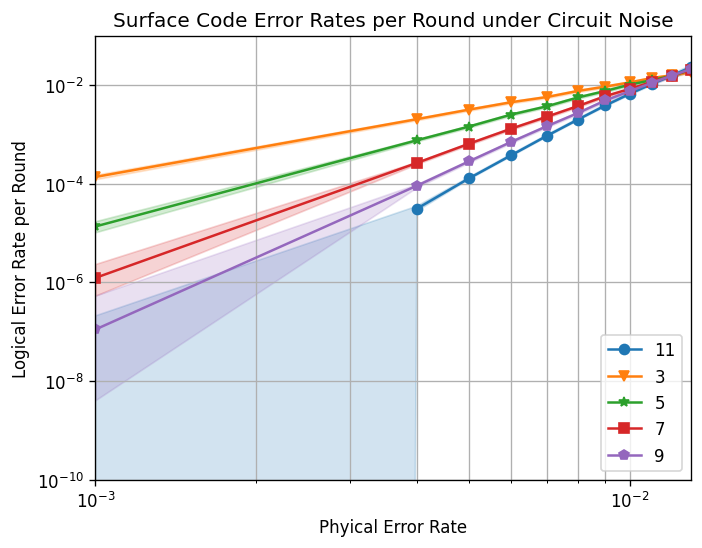

In [24]:
fig, ax = plt.subplots(1, 1)
sinter.plot_error_rate(
    ax=ax,
    stats=collected_surface_code_stats,
    x_func=lambda stat: stat.json_metadata['p'],
    group_func=lambda stat: stat.json_metadata['d'],
    failure_units_per_shot_func=lambda stat: stat.json_metadata['r'],
)
ax.set_ylim(1e-10, 0.1)
ax.set_xlim(min(noise_list), max(noise_list))
ax.loglog()
ax.set_title("Surface Code Error Rates per Round under Circuit Noise")
ax.set_xlabel("Phyical Error Rate")
ax.set_ylabel("Logical Error Rate per Round")
ax.grid(which='major')
ax.grid(which='minor')
ax.legend()
fig.set_dpi(120)  # Show it bigger